# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('Algerian_forest_cleaned.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [37]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
# drop day month and year since they're not required
df=df.drop(['day', 'month' , 'year'], axis=1)

In [40]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [42]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [43]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [44]:
df['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [45]:
# independent and dependent features
# take any numerical feature for regression problem
x=df.drop('FWI', axis=1)
y=df['FWI']

In [46]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [47]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test= train_test_split(x,y, test_size=0.35, random_state=33)



In [49]:
x_train.shape , x_test.shape

((157, 11), (86, 11))

In [50]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.670293,-0.398235,-0.317622,0.696259,0.483960,0.345097,0.598958,0.447667,0.518307,0.344727
RH,-0.670293,1.000000,0.306195,0.221850,-0.631334,-0.386241,-0.167346,-0.640048,-0.315656,-0.419859,-0.442494
Ws,-0.398235,0.306195,1.000000,0.236979,-0.291376,-0.079069,0.005582,-0.035607,-0.048250,-0.172378,-0.258600
Rain,-0.317622,0.221850,0.236979,1.000000,-0.507958,-0.283695,-0.283292,-0.336393,-0.292951,-0.380042,-0.031194
FFMC,0.696259,-0.631334,-0.291376,-0.507958,1.000000,0.614438,0.481037,0.736995,0.593403,0.767147,0.216600
DMC,0.483960,-0.386241,-0.079069,-0.283695,0.614438,1.000000,0.866815,0.661797,0.978746,0.560693,0.189508
DC,0.345097,-0.167346,0.005582,-0.283292,0.481037,0.866815,1.000000,0.446913,0.936244,0.440187,-0.083695
ISI,0.598958,-0.640048,-0.035607,-0.336393,0.736995,0.661797,0.446913,1.000000,0.612789,0.736714,0.272172
BUI,0.447667,-0.315656,-0.048250,-0.292951,0.593403,0.978746,0.936244,0.612789,1.000000,0.551054,0.080152
Classes,0.518307,-0.419859,-0.172378,-0.380042,0.767147,0.560693,0.440187,0.736714,0.551054,1.000000,0.213555


 now we will perform feauture selection on this data
 whichever two features have more than 85% (threshold is decided by domain expert )corr will be dropped
as they are almost the same feature
i.e when two features are highly corelated they act like similar feature

In [51]:
# check for multi colinearity
# lets say we have 3 features a, b and c 
# if a is highly corr to b and b is highly corr to c
# then we can drop a feature 

<Axes: >

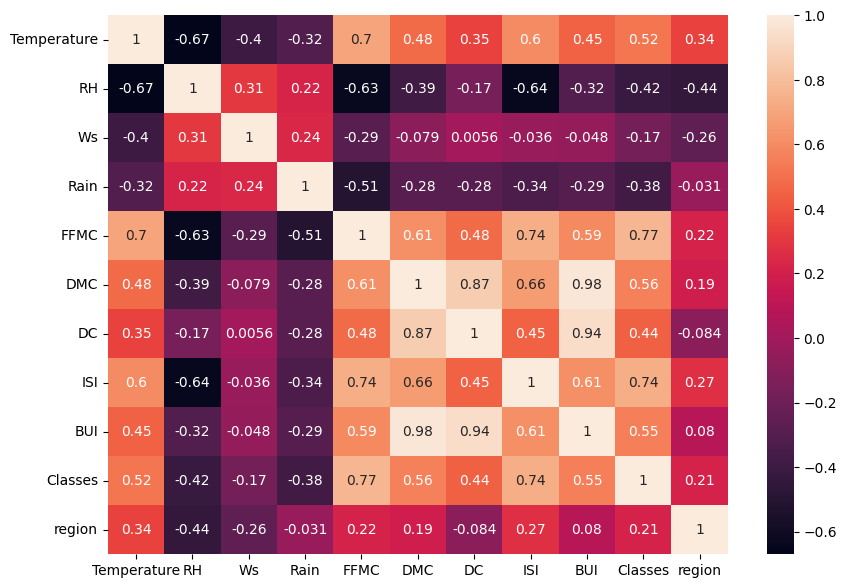

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(x_train.corr(), annot=True)

In [53]:
def correaltion(dataset , threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [54]:
# thrshold domain expertise
corr_features= correaltion(x_train , 0.85)
corr_features

{'BUI', 'DC'}

In [55]:
# drop features when correlation is more than 85%
x_train.drop(corr_features , axis=1 , inplace=True)
x_test.drop(corr_features , axis=1 , inplace=True)
x_train.shape , x_test.shape

((157, 9), (86, 9))

# Feature scaling or standardization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [58]:
x_train_scaled

array([[ 1.07720115, -1.25564112, -0.85447281, ...,  0.96808352,
         0.8969937 ,  1.01929438],
       [-1.25148154,  1.23362005,  1.82188092, ..., -1.00347336,
        -1.11483503, -0.98107084],
       [ 0.20394514, -0.35674125,  0.14915984, ...,  0.55840936,
         0.8969937 ,  1.01929438],
       ...,
       [-0.66931087,  0.26557404, -0.18538437, ..., -0.77303165,
        -1.11483503,  1.01929438],
       [-1.54256688,  1.16447391,  0.14915984, ..., -1.029078  ,
        -1.11483503,  1.01929438],
       [-0.66931087,  1.09532776, -0.51992859, ..., -0.49138067,
         0.8969937 , -0.98107084]], shape=(157, 9))

Text(0.5, 1.0, 'Boxplot after scaling')

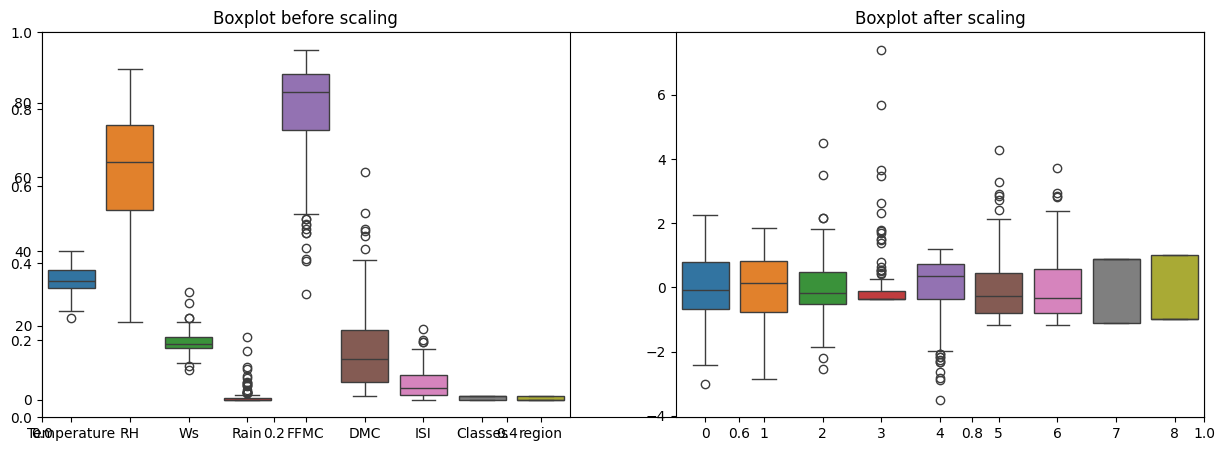

In [61]:
# Box plot to understand effect of standard scalar
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Boxplot before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('Boxplot after scaling')


# linear regression model

Mean absolute error : 1.7314364550249188
r2 score : 0.9094825675573959


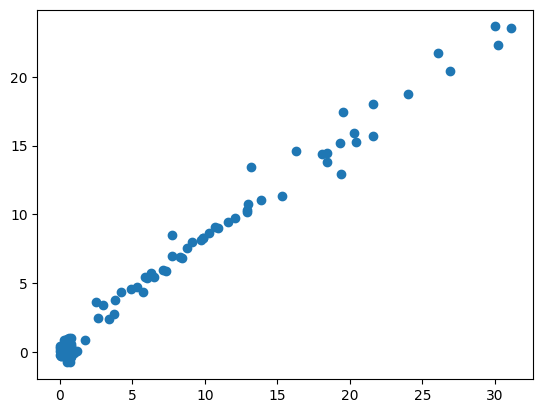

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred= lr.predict(x_test_scaled)
mae= mean_absolute_error(y_test , y_pred)
score=r2_score(y_test, y_pred)
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test , y_pred) 
# y_test_reset = y_test.reset_index(drop=True)
# y_pred_reset = pd.Series(y_pred).reset_index(drop=True)
# sorted_indices = np.argsort(y_test)
# plt.plot(y_test[sorted_indices], y_pred[sorted_indices], color='red', label='Best Fit Line')
# plt.plot(y_test, y_pred, color='red' )
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])


In [83]:
lr.coef_

array([ 0.16760265, -0.08497043,  0.11220438, -0.0269955 , -0.91568378,
        3.22303576,  4.12430408,  0.64856946, -0.35310178])

# Lasso regression

Mean absolute error : 2.344898065094294
r2 score : 0.5989484193518793


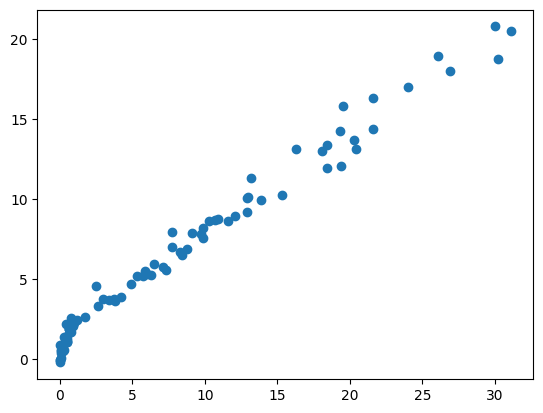

In [76]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train )
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_pred , y_test)
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test, y_pred)

# Cross validation lasso

In [93]:
from sklearn.linear_model import LassoCV
lscv=LassoCV(cv=5)
lscv.fit(x_train_scaled, y_train)



LassoCV(cv=5)

In [95]:
lscv.alpha_

np.float64(0.03268199200476418)

In [97]:
lscv.alphas_

array([6.1240086 , 5.71127092, 5.32635037, 4.96737219, 4.63258793,
       4.320367  , 4.02918873, 3.75763489, 3.50438288, 3.2681992 ,
       3.04793351, 2.84251299, 2.65093713, 2.47227284, 2.30564993,
       2.15025684, 2.00533672, 1.87018374, 1.74413962, 1.62659044,
       1.51696369, 1.41472542, 1.31937766, 1.23045602, 1.1475274 ,
       1.0701879 , 0.99806081, 0.93079485, 0.8680624 , 0.8095579 ,
       0.7549964 , 0.70411217, 0.65665737, 0.61240086, 0.57112709,
       0.53263504, 0.49673722, 0.46325879, 0.4320367 , 0.40291887,
       0.37576349, 0.35043829, 0.32681992, 0.30479335, 0.2842513 ,
       0.26509371, 0.24722728, 0.23056499, 0.21502568, 0.20053367,
       0.18701837, 0.17441396, 0.16265904, 0.15169637, 0.14147254,
       0.13193777, 0.1230456 , 0.11475274, 0.10701879, 0.09980608,
       0.09307949, 0.08680624, 0.08095579, 0.07549964, 0.07041122,
       0.06566574, 0.06124009, 0.05711271, 0.0532635 , 0.04967372,
       0.04632588, 0.04320367, 0.04029189, 0.03757635, 0.03504

Mean absolute error : 1.7084647400563333
r2 score : 0.9066519832971829


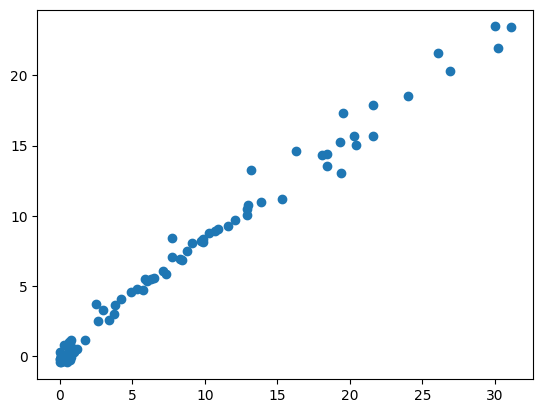

In [98]:
y_pred= lscv.predict(x_test_scaled)
plt.scatter(y_test , y_pred)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred) 
print('Mean absolute error :', mae)
print('r2 score :', score)

# Ridge regression

Mean absolute error : 1.730975134214245
r2 score : 0.9080816695114766


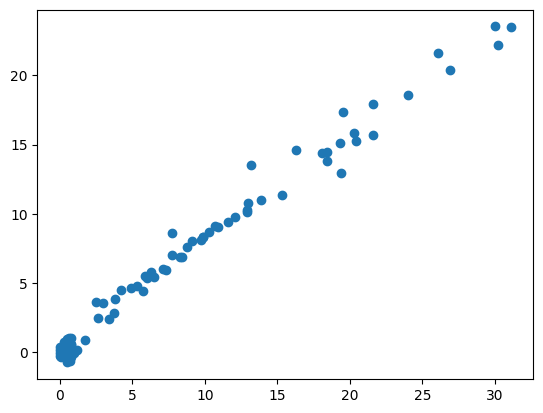

In [99]:
from sklearn.linear_model import Ridge
ridge=Ridge() 
ridge.fit(x_train_scaled, y_train) 
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred) 
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test , y_pred)

Mean absolute error : 1.730975134214245
r2 score : 0.9080816695114766


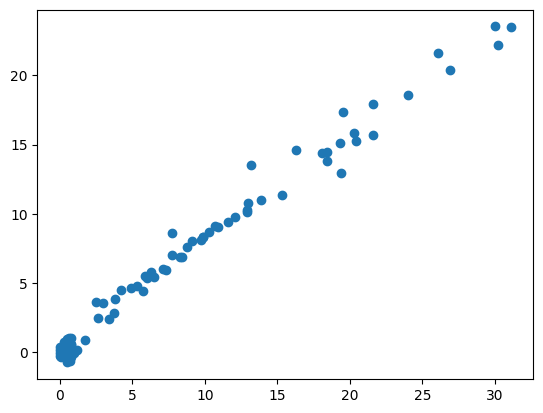

In [101]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV(cv=5)
rcv.fit(x_train_scaled, y_train)
y_pred=rcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred) 
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test , y_pred)

In [103]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic net regression

Mean absolute error : 2.6715973295592597
r2 score : 0.7649859271640145


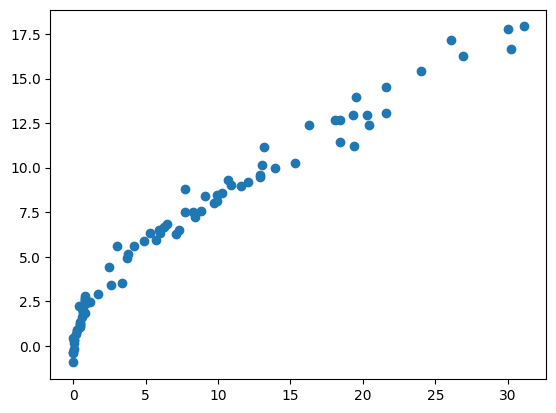

In [104]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet()
enet.fit(x_train_scaled, y_train)
y_pred=enet.predict(x_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred) 
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test , y_pred)

Mean absolute error : 2.6715973295592597
r2 score : 0.7649859271640145


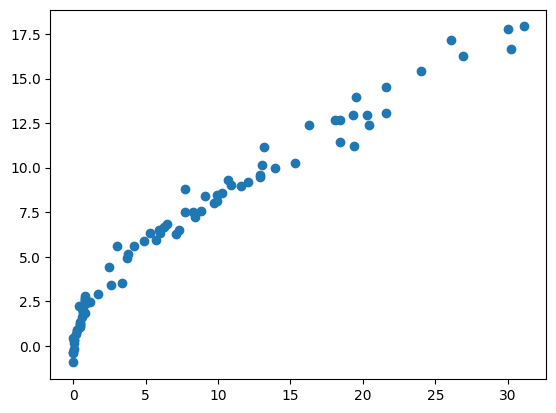

In [105]:
from sklearn.linear_model import ElasticNetCV
enetcv=ElasticNet()
enetcv.fit(x_train_scaled, y_train)
y_pred=enetcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test , y_pred)
score=r2_score(y_test , y_pred) 
print('Mean absolute error :', mae)
print('r2 score :', score)
plt.scatter(y_test , y_pred)

In [106]:
# Pickling
import pickle
pickle.dump(scaler , open('scaler.pkl', 'wb'))
pickle.dump(ridge , open('ridge.pkl', 'wb'))